In [1]:
1+1

2

In [2]:
import numpy as np
import pylab as plt

import sys
sys.path.append('/data/id01/inhouse/bellec/software/sharedipynb/gitlab/bcdi_eb/')
from Reconstruction import *
from Plot_utilities import *
from Global_utilities import *

from Reconstruction_crop_algo import *

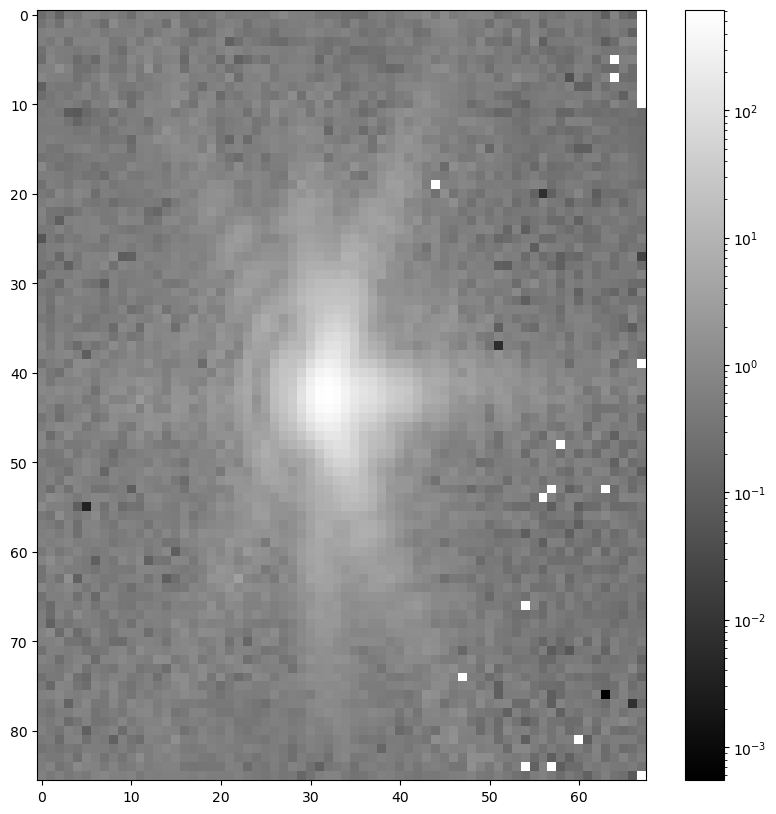

In [3]:
# preprocessed_datapath = 'preprocessed_data_EBsample4/dataset_EBsample4_0029_scan_5_ortho_rebin_linbackcorr_rotremoved.npz'
# preprocessed_datapath = 'preprocessed_data_day2afternoon/dataset_day2afternoon_0024_scan_3_rebin_rotremoved_labspace.npz'
preprocessed_datapath = 'preprocessed_data_day2afternoon/dataset_day2afternoon_0024_scan_3_ortho_rebin_rotremoved.npz'

data, mask, file_dict = load_diffraction_data_Q_space(preprocessed_datapath,
                                                                          plot=True, vmin=None)

# Remove background (optional)

In [4]:
remove_background = False
background = .1

if remove_background:
    data_clean = np.copy(data)
    data_clean = data_clean-background
    data_clean[data_clean<0] = 0
    plt.matshow(np.log(data_clean), cmap='gray')

In [5]:
if remove_background:
    
    additional_string = '_back{}'.format(background)
    additional_string = additional_string.replace('.','p')
    file_dict['savename_add_string'] = str(file_dict['savename_add_string'])+additional_string
    
    data = np.copy(data_clean)

# Test one reconstruction

In [6]:
crop_factor_list = [2]
data_centering = True
mask_used = None  #None

# params = None
params = default_cdi_parameters()
params['support_threshold_relative_min'] = .1
params['support_threshold_relative_max'] = .5
params['algo_string'] = 'HIO_800 RAAR_800'


crop_factor 2
Using autocorrelation as an initial support. If you're not happy, give either a support or an obj_init
using autocorrelation as support
  ER #1600 LLK=   0.078[free=  1.762](p), nb photons=2.511844e+04, support:nb=    94 ( 6.283%) <obj>=     16.35 max=     37.65, out=0.002% dt/cycle=0.0125s [PSF]


/data/id01/inhouse/bellec/software/sharedipynb/gitlab/bcdi_eb/Object_utilities.py:129: FutureWarning: `seed` is a deprecated argument name for `unwrap_phase`. It will be removed in version 0.23. Please use `rng` instead.
  phase = unwrap_phase_skimage(



final reconstruction
using the support array given by user
  ER #1600 LLK=   0.039[free=  0.181](p), nb photons=2.731772e+04, support:nb=   358 ( 6.122%) <obj>=      8.74 max=     53.69, out=0.001% dt/cycle=0.0039s [PSF]


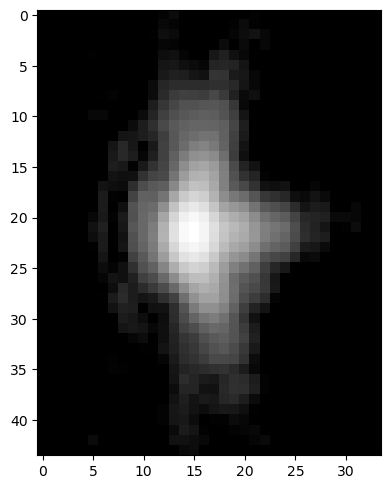

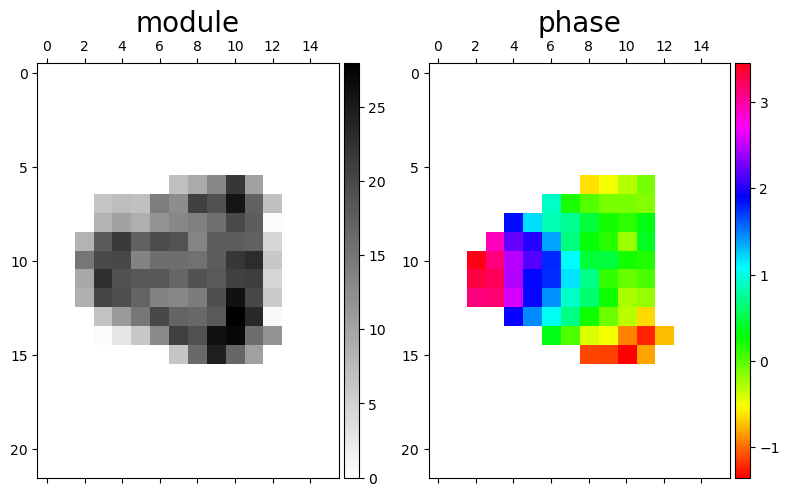

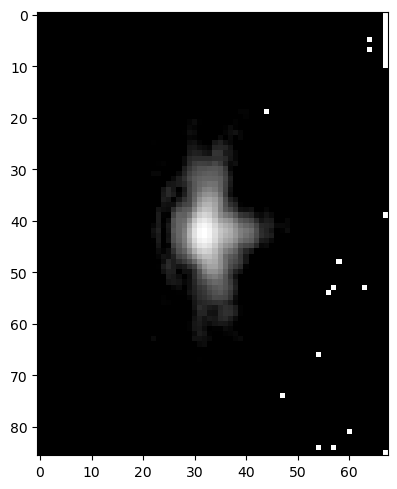

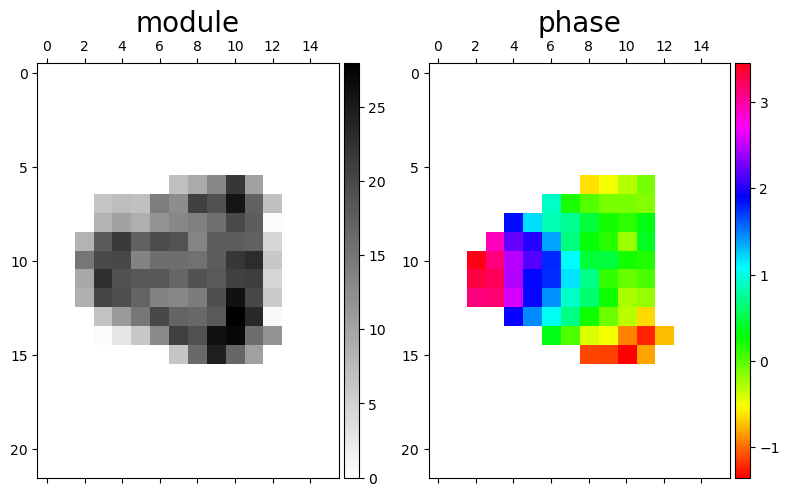

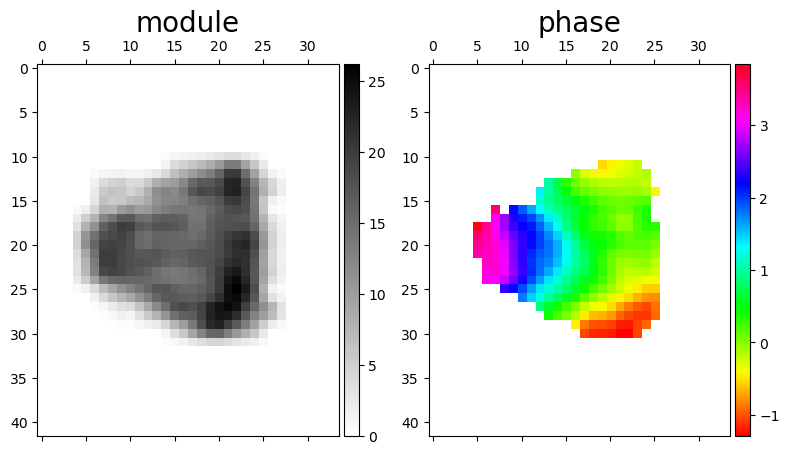

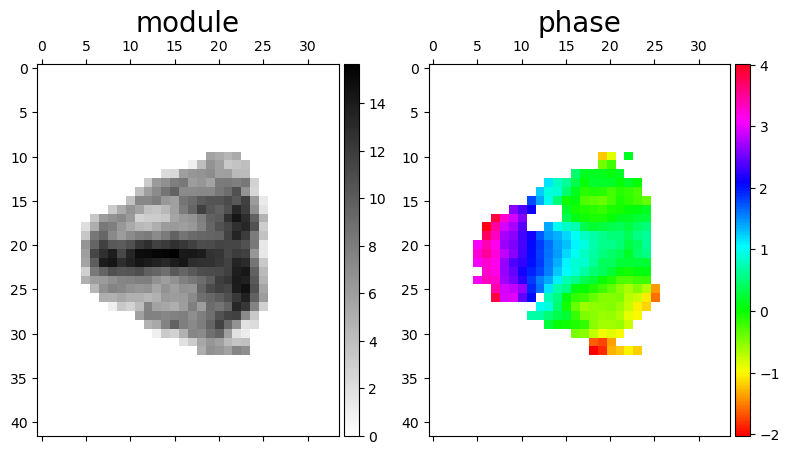

In [7]:
obj, llk, support, return_dict = crop_scale_function(data, 
                                        crop_factor_list = crop_factor_list, 
                                                     mask=mask_used,
                                        params=params, # default reconstruction parameters
#                                                      data_centering=True 
                                        plot=True, verbose=True)

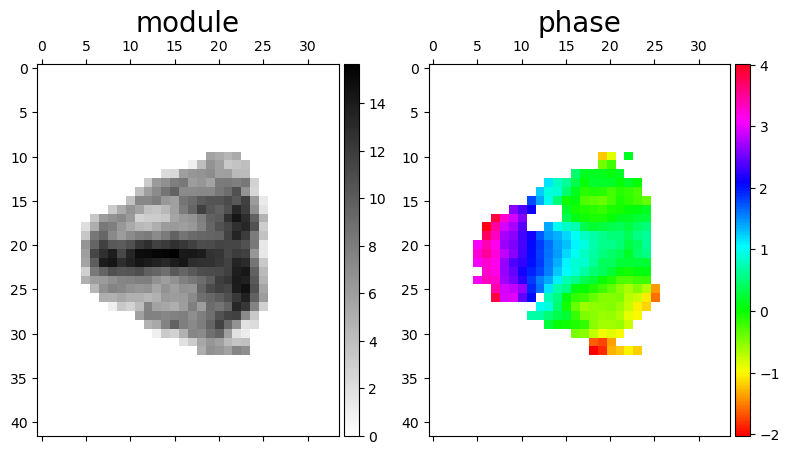

In [8]:
plot_object_module_phase_2d(obj)

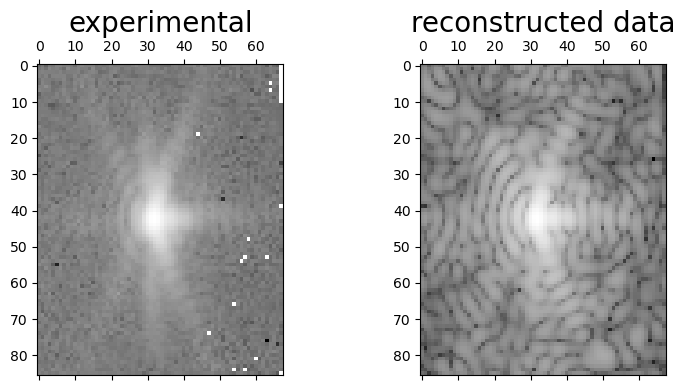

In [9]:
compare_reconstuction_to_real_data(data,obj)

# Several reconstructions

In [10]:
crop_factor_list = [2]
data_centering = True
mask_used = None  #None

# params = None
params = default_cdi_parameters()
params['support_threshold_relative_min'] = .1
params['support_threshold_relative_max'] = .5
params['algo_string'] = 'HIO_800 RAAR_800'

In [11]:
Nb_reconstruction = 20

make_several_reconstructions_crop_algo(data, file_dict, Nb_reconstruction, 
                                           crop_factor_list,
                                       mask=mask_used,
                                           params=params,  # default reconstruction parameters
                                           plot=False, verbose=False,
                                      data_centering=data_centering)

Using autocorrelation as an initial support. If you're not happy, give either a support or an obj_init
using autocorrelation as support
  ER #1600 LLK=   0.047[free=  0.520](p), nb photons=2.492317e+04, support:nb=   451 (30.147%) <obj>=      7.43 max=     50.39, out=0.000% dt/cycle=0.0009s [PSF]
using the support array given by user
  ER #1600 LLK=   0.041[free=  0.153](p), nb photons=2.711612e+04, support:nb=   319 ( 5.455%) <obj>=      9.22 max=     53.08, out=0.001% dt/cycle=0.0009s [PSF]


sucessfull reconstruction


Using autocorrelation as an initial support. If you're not happy, give either a support or an obj_init
using autocorrelation as support
  ER #1600 LLK=   0.054[free=  0.318](p), nb photons=2.481710e+04, support:nb=   148 ( 9.893%) <obj>=     12.95 max=     40.98, out=0.001% dt/cycle=0.0009s [PSF]
using the support array given by user
  ER #1600 LLK=   0.047[free=  0.825](p), nb photons=2.801876e+04, support:nb=  2663 (45.537%) <obj>=      3.24 max=     78.96, out=0.00

  ER #1600 LLK=   0.077[free=  2.253](p), nb photons=2.852939e+04, support:nb=  3557 (60.824%) <obj>=      2.83 max=     88.70, out=0.000% dt/cycle=0.0015s [PSF]


sucessfull reconstruction


Using autocorrelation as an initial support. If you're not happy, give either a support or an obj_init
using autocorrelation as support
  ER #1600 LLK=   0.302[free=  0.135](p), nb photons=2.474868e+04, support:nb=    73 ( 4.880%) <obj>=     18.41 max=     35.33, out=0.009% dt/cycle=0.0014s [PSF]
using the support array given by user
  ER #1600 LLK=   0.038[free=  0.161](p), nb photons=2.727632e+04, support:nb=   544 ( 9.302%) <obj>=      7.08 max=     56.65, out=0.025% dt/cycle=0.0014s [PSF]


sucessfull reconstruction


Using autocorrelation as an initial support. If you're not happy, give either a support or an obj_init
using autocorrelation as support
  ER #1600 LLK=   0.043[free=  0.488](p), nb photons=2.493815e+04, support:nb=   360 (24.064%) <obj>=      8.32 max=     48.51, out=0.000% dt/cy

# Test on the best recon algo

In [14]:
# Nb_reconstruction = 20

# # params = None
# params = default_cdi_parameters()
# params['support_threshold_relative_min'] = .23
# params['support_threshold_relative_max'] = .3
# params['algo_string'] = 'HIO_400 RAAR_1000 ER_300'
# params['center_data'] = True

# params['show_cdi'] = None # could be removed
# params['plot_result'] = False

In [ ]:
# make_several_reconstructions(data, params, file_dict, Nb_reconstruction,
#                             dont_erase_previous_recon=True)